In [1]:
import sys
sys.path.append('/Users/benj/Documents/SpEC_class_2')
import SpEC_class_2 as sp
import hlo2parquet as h2p
import calibrate_downsample_parquet as cdp
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import copy
from scipy.optimize import lsq_linear


# import 1. Convert HLO to parquet if needed

In [2]:
if True:
    input_hlo_path = r"/Users/benj/Documents/SpEC_Class_2/test_data/ANDORSPEC-0.0.0.0__0.hlo"
    output_parquet_path = r"/Users/benj/Documents/SpEC_Class_2/test_data/pds.parquet"
    h2p.hlo_to_parquet(input_hlo_path, output_parquet_path, HiSpEC=True)

# 2. minimal downsample of Parquet

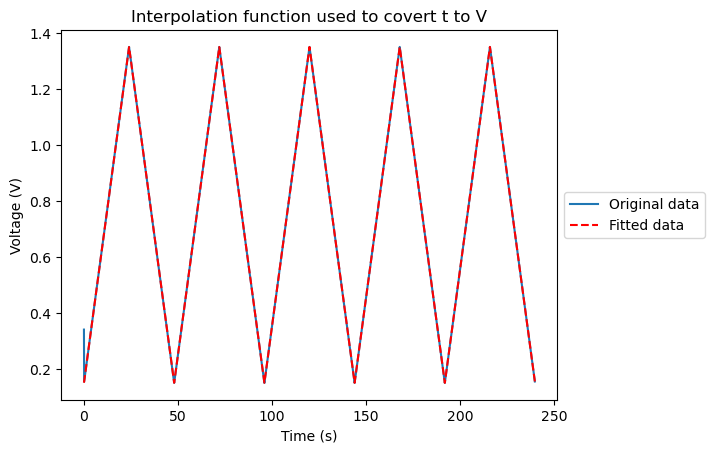

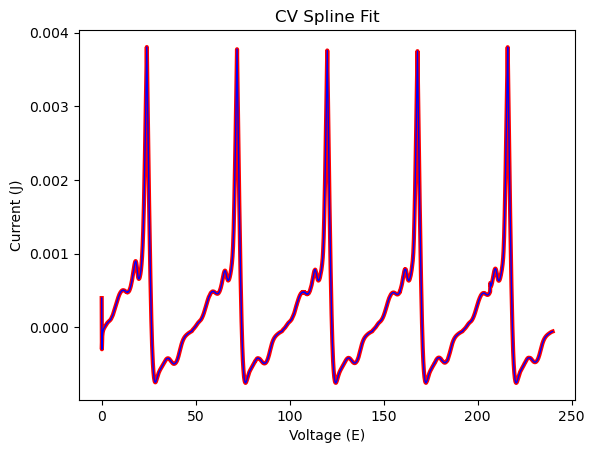

In [45]:
if True:    
    cv_path=r"/Users/benj/Documents/SpEC_Class_2/test_data/CV-3.3.0.0__0.hlo"
    spec_path=r"/Users/benj/Documents/SpEC_Class_2/test_data/ANDORSPEC.parquet"
    output_parquet_path = r"/Users/benj/Documents/SpEC_Class_2/test_data/"
    cdp.fully_read_and_calibrate_parquet(cv_path=cv_path, spec_path=spec_path, output_path=output_parquet_path, write_file=True)


In [43]:
pd.read_parquet(spec_path)

,t_s,399.0,400.0,401.0,402.0,403.0,404.0,405.0,406.0,407.0,...,932.0,933.0,934.0,935.0,936.0,937.0,938.0,939.0,940.0,941.0
0,0.000000,1876570.0,1745676.50,1805761.6,1879420.6,1937440.75,2008353.4,2083897.8,2163480.75,2242564.4,...,1450297.4,1434965.50,1423545.8,1413184.2,1398682.2,1388219.00,1377087.0,1373164.6,1354004.8,1.342034e+06
1,0.010200,1873413.0,1742670.25,1803694.4,1876550.4,1937854.25,2006431.0,2083929.0,2159189.50,2241043.8,...,1447954.0,1436902.00,1422202.0,1409683.2,1395834.8,1387009.25,1376889.8,1369644.4,1353593.4,1.342486e+06
2,0.020401,1873589.0,1742636.75,1803457.4,1876369.8,1934777.25,2005084.8,2082815.0,2161109.25,2238143.2,...,1448829.8,1435211.00,1422826.2,1409898.6,1397237.8,1384999.25,1374305.6,1371775.8,1353441.8,1.340820e+06
3,0.030601,1874131.0,1743699.75,1801832.8,1876658.6,1936133.25,2006700.2,2083633.4,2159091.50,2239245.2,...,1449384.8,1435338.75,1421055.4,1410512.2,1396762.4,1386058.00,1376733.2,1371145.8,1353320.2,1.343105e+06
4,0.040801,1876475.0,1742766.00,1804801.2,1877738.2,1936420.75,2006365.2,2085269.4,2161095.00,2241509.4,...,1450008.2,1435273.25,1422536.2,1410740.8,1397503.2,1387094.00,1376625.0,1370731.4,1354118.4,1.342359e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24702,251.968750,1823007.0,1692742.25,1752649.6,1822018.4,1880867.50,1948338.2,2022077.2,2098153.50,2175190.0,...,1393685.8,1380702.75,1369163.2,1359595.6,1343980.2,1334409.00,1326459.2,1318374.2,1303006.4,1.292287e+06
24703,251.978950,1817654.0,1691424.75,1749798.2,1822163.4,1877731.75,1947661.0,2020571.6,2094495.00,2173712.8,...,1394260.6,1381531.25,1368625.6,1357075.4,1344714.0,1332906.50,1324434.8,1318319.2,1303116.2,1.291098e+06
24704,251.989151,1819858.0,1690570.25,1749893.0,1820328.0,1875451.25,1944633.6,2019125.0,2096192.75,2173677.0,...,1393764.0,1381026.25,1367026.2,1356761.2,1342411.6,1333404.75,1322597.4,1318270.8,1301750.2,1.291461e+06
24705,251.999351,1818172.0,1689466.25,1749897.0,1823666.0,1878408.25,1946018.2,2022816.8,2094635.00,2173034.0,...,1392376.0,1380740.50,1368191.6,1357053.8,1341423.0,1333481.50,1323466.2,1318576.0,1302852.6,1.290098e+06


# 3 Read the downsampled parquet, perform RHE and iR correction

In [4]:
calibrated_parquet_path = r"/Users/benj/Documents/SpEC_Class_2/test_data/spectra_calibrated.parquet"
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(cv_path)
RHE_corr=0.210+0.059
Rs=17 # cell resistance in ohm
SpEC1.read_spec_parquet(calibrated_parquet_path)


SpEC1.Andorspec['U (V)'] = SpEC1.Andorspec['U (V)'] + RHE_corr
SpEC1.Andorspec['U (V)'] = SpEC1.Andorspec['U (V)']-SpEC1.Andorspec['J (A)'] * Rs
SpEC1.populate_spec_scans()

SpEC1.populate_interpolation('interpolation.json')

SpEC1.populate_CV_scans()


{0: {'anodic':         Ewe_V       I_A        t_s
  0    0.341244  0.000396   0.000090
  1    0.155376 -0.000299   0.100485
  2    0.160406 -0.000173   0.200880
  3    0.165414 -0.000121   0.301275
  4    0.170390 -0.000092   0.401715
  ..        ...       ...        ...
  235  1.330259  0.003182  23.597190
  236  1.335222  0.003335  23.697630
  237  1.340246  0.003489  23.798025
  238  1.345250  0.003647  23.898420
  239  1.350376  0.003805  23.998860
  
  [240 rows x 3 columns],
  'cathodic':         Ewe_V       I_A        t_s
  240  1.346017  0.003618  24.099255
  241  1.340941  0.003425  24.199650
  242  1.335874  0.003240  24.300045
  243  1.330945  0.003056  24.400485
  244  1.325850  0.002876  24.500880
  ..        ...       ...        ...
  474  0.170909 -0.000058  47.595961
  475  0.165977 -0.000057  47.696401
  476  0.160878 -0.000056  47.796796
  477  0.155961 -0.000055  47.897191
  478  0.150884 -0.000053  47.997631
  
  [239 rows x 3 columns]},
 1: {'anodic':         Ewe_V

# Stability

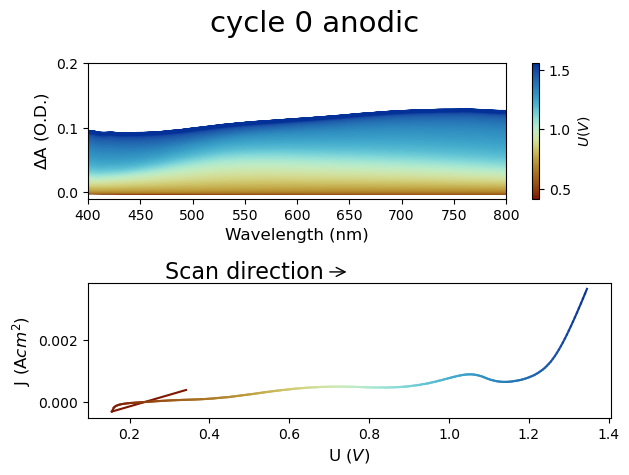

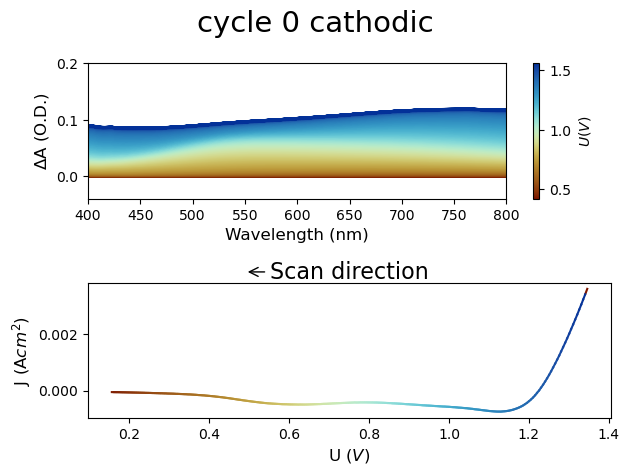

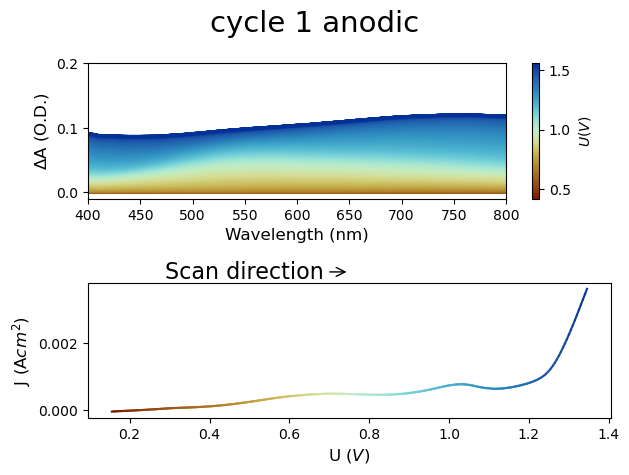

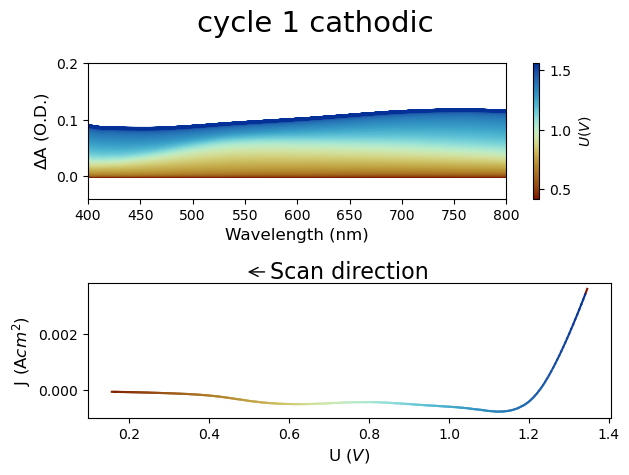

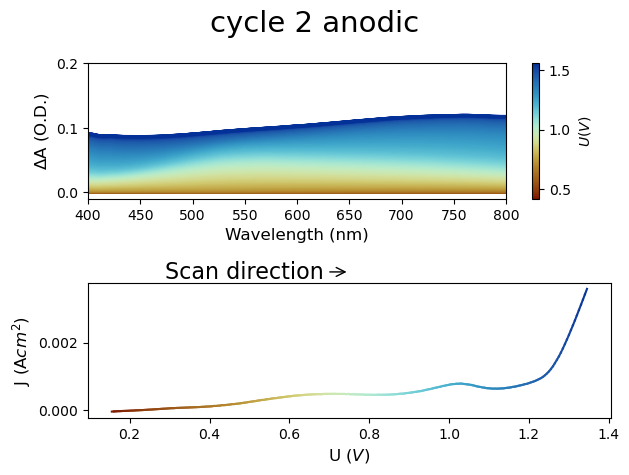

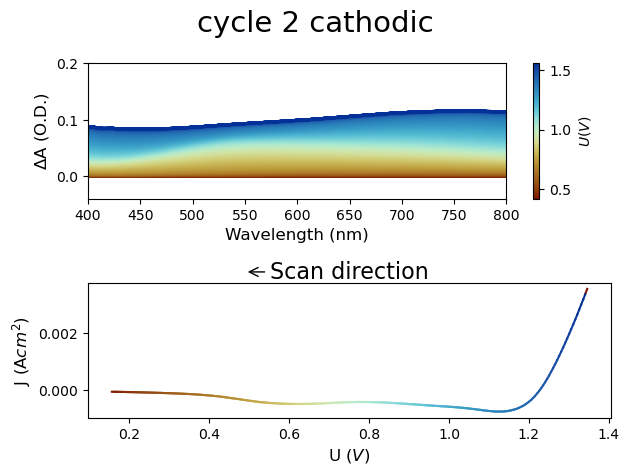

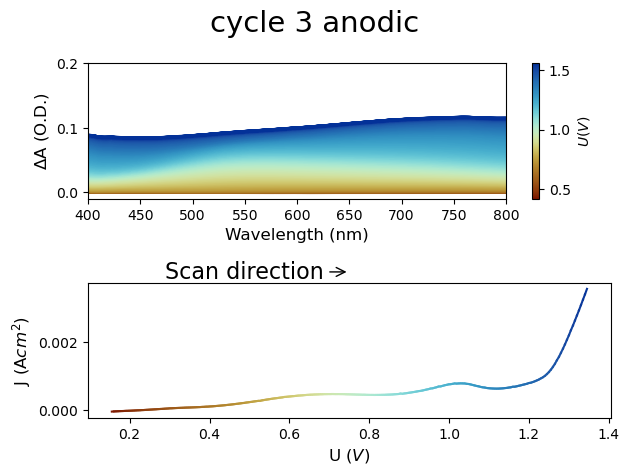

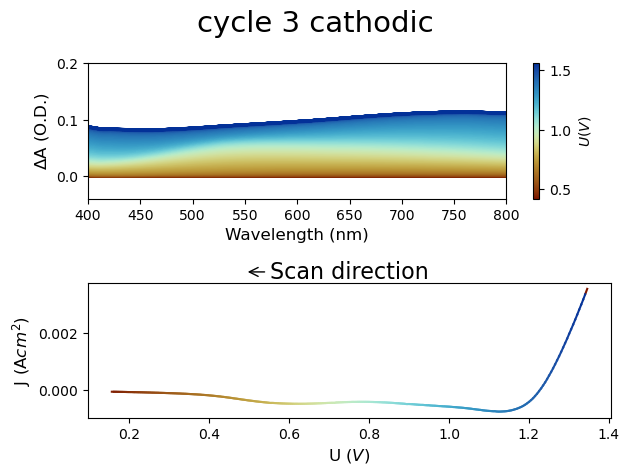

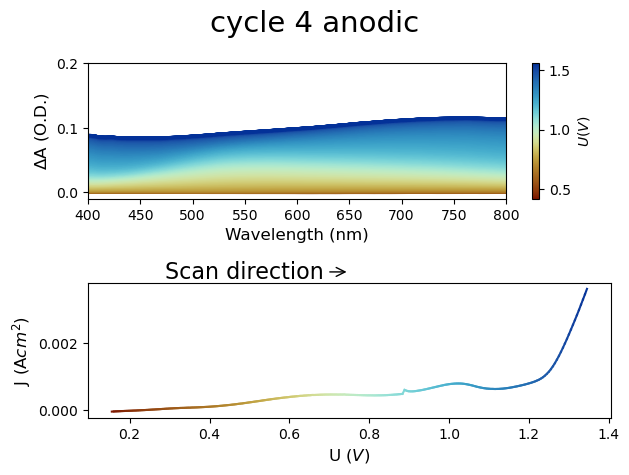

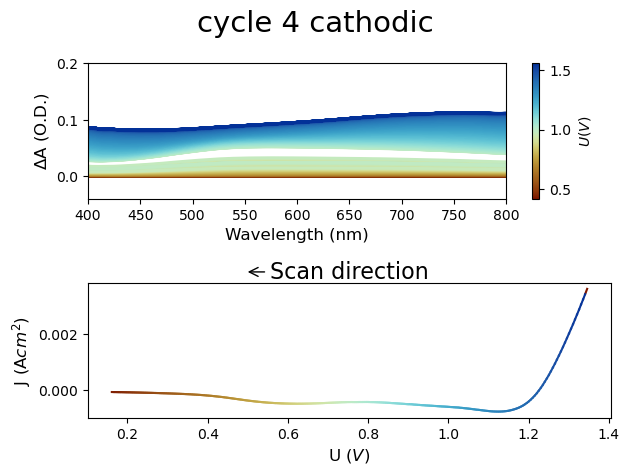

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -0.2V_{Ag/AgCl}$)'>)

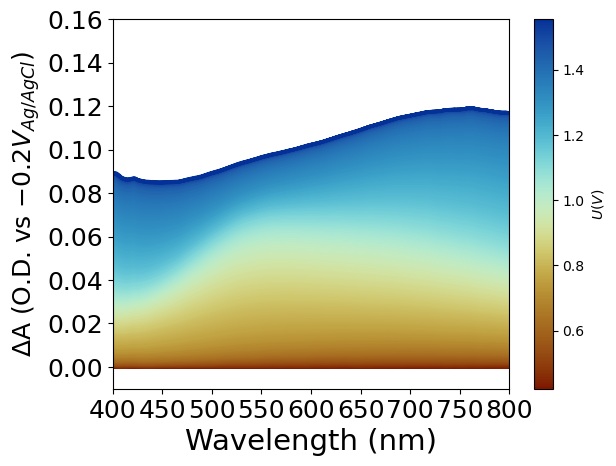

In [6]:
for key, value in SpEC1.CV_scans.items():

            for key2, value2 in value.items():
                CV=SpEC1.CV_scans[key][key2]
                if key2 == 'anodic':
                    test, ref =sp.calculateDOD(SpEC1, key, key2, -2, 21)
                    sp.Co_plot_DOD_and_CV(test,
                                        CV,
                                            Title=f'cycle {key} {key2}',
                                            y_max=0.2, y_min=-0.01,
                                                x_min=400, x_max=800,
                                                reference_potential=f"$ {ref}V_{{RHE}}$",
                                                    scan_direction=key2,
                                                    cmap_option=cmc.roma)
                elif key2 == 'cathodic':
                    test, ref =sp.calculateDOD(SpEC1, key, key2, -2, 21)
                    sp.Co_plot_DOD_and_CV(test,
                                        CV,
                                            Title=f'cycle {key} {key2}',
                                            y_max=0.2, y_min=-0.04,
                                                x_min=400, x_max=800,
                                                reference_potential=f"$ {ref}V_{{RHE}}$",
                                                    scan_direction=key2,
                                                    cmap_option=cmc.roma)
                #plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
                plt.close() 

data, ref=sp.calculateDOD(SpEC1, 0, 'cathodic', -0.2, 21)
sp.plot_DOD(data, y_max=0.16, y_min=-0.01, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

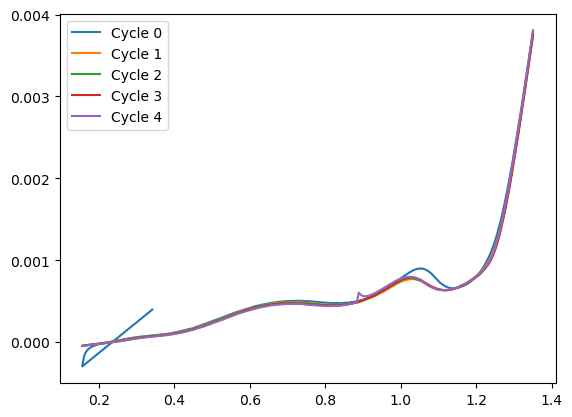

In [7]:
# iteater through the CV scans and plot the 'anoic' data for each cycle

for key, value in SpEC1.CV_scans.items():
    plt.plot(SpEC1.CV_scans[key]['anodic'].iloc[:,0], SpEC1.CV_scans[key]['anodic'].iloc[:,1], label=f'Cycle {key}')
plt.legend()



In [8]:
len(SpEC1.spec_scans_downsampled.items())

AttributeError: 'SpEC' object has no attribute 'spec_scans_downsampled'

previous (543, 1200)
previous (543, 1200)
current (543, 1200)
previous (543, 1200)
current (543, 1201)
previous (543, 1201)
current (543, 1200)
previous (543, 1200)
current (543, 1200)


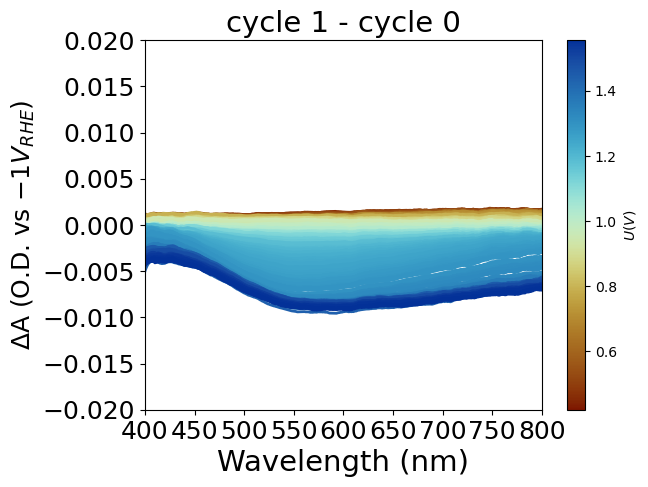

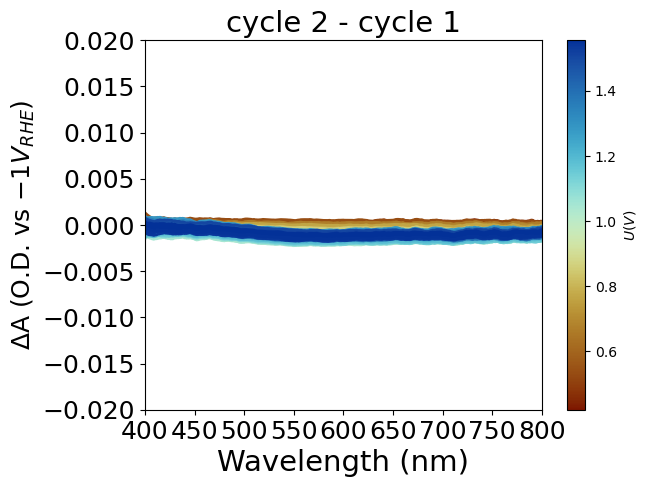

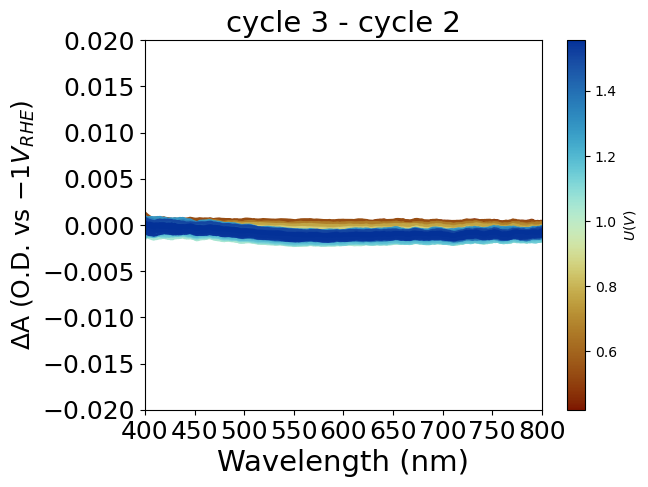

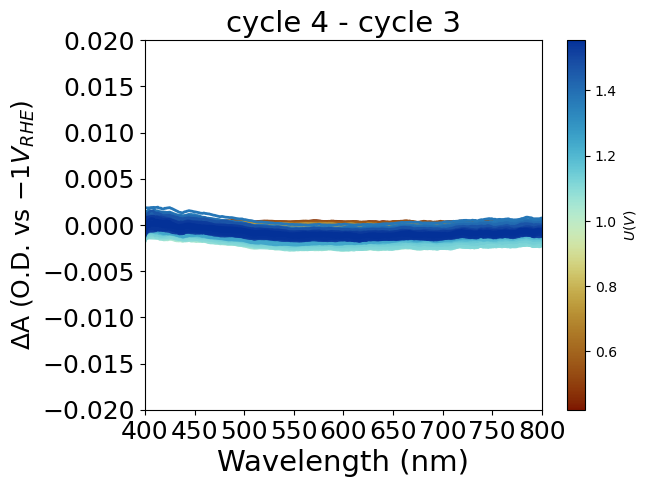

In [9]:
# iterate through spec scans downsampled 'anodic' cycles. Calculate DOD and the subtract 
#each cycle from the previous cycle, starting at cycle 1. Plot the results


# extract all cycles from the spec scans of the 'anodic' data
diff_dict={}
for i in range(len(SpEC1.spec_scans.items())):
    if i == 0:
        previousDOD, ref =sp.calculateDOD(SpEC1, i, 'anodic', -2, 21)
        print('previous',previousDOD.shape)
    else:
        previousDOD, ref =sp.calculateDOD(SpEC1, i-1, 'anodic', -2, 21)
        print('previous',previousDOD.shape)
        #print(previousDOD.head())   
        currentDOD, ref =sp.calculateDOD(SpEC1, i, 'anodic', -1, 21)
        #print(currentDOD.head())
        print('current',currentDOD.shape)
        if currentDOD.shape[1] == previousDOD.shape[1]:
            diffDOD= pd.DataFrame(currentDOD.iloc[:,:].values - previousDOD.values, columns=currentDOD.columns, index=currentDOD.index)
        elif currentDOD.shape[1] == previousDOD.shape[1]+1:
            diffDOD= pd.DataFrame(currentDOD.iloc[:,0:-1].values - previousDOD.values, columns=currentDOD.columns[1:], index=currentDOD.index)

        #print(diffDOD.head())
        sp.plot_DOD(diffDOD, Title=f'cycle {i} - cycle {i-1}', y_max=0.02, y_min=-0.02, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{RHE}}$")
        diff_dict[i] = diffDOD



# reversible redox - choose spectrum

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ 0.439V_{RHE}$)'>)

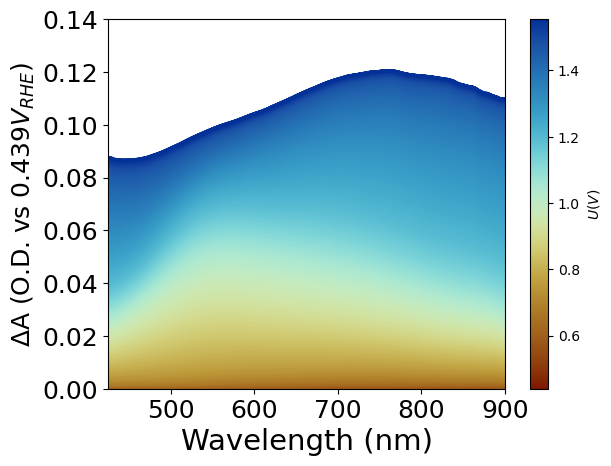

In [10]:
refpot=0.17+0.210+0.059
WL_min=425
max_pot=2
data, ref=sp.calculateDOD(SpEC1, 1, 'anodic', refpot, 33)
data1=data.iloc[data.index.values>WL_min,(data.columns.values>=refpot) & (data.columns.values<=max_pot)]

sp.plot_DOD(data1, y_max=0.14, y_min=-0.0, x_min=WL_min, x_max=900, reference_potential=f"$ {ref}V_{{RHE}}$")




# spectral decomposition

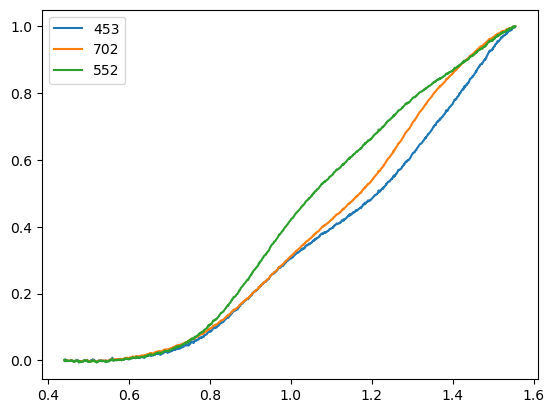

In [11]:
# extract the data at 450 nm and plot as a function of the column index

WL_val=453
trace450=data1.iloc[data1.index.values==WL_val,:]

plt.plot(trace450.columns, trace450.values[0,:]/trace450.values.max(), label=f'{WL_val}')

WL_val=702
trace850=data1.iloc[data1.index.values==WL_val,:]

plt.plot(trace850.columns, trace850.values[0,:]/trace850.values.max(),label=f'{WL_val}')

WL_val=552
trace550=data1.iloc[data1.index.values==WL_val,:]

plt.plot(trace550.columns, trace550.values[0,:]/trace550.values.max(),label=f'{WL_val}')

plt.legend()

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ 0.439V_{Ag/AgCl}$)'>)

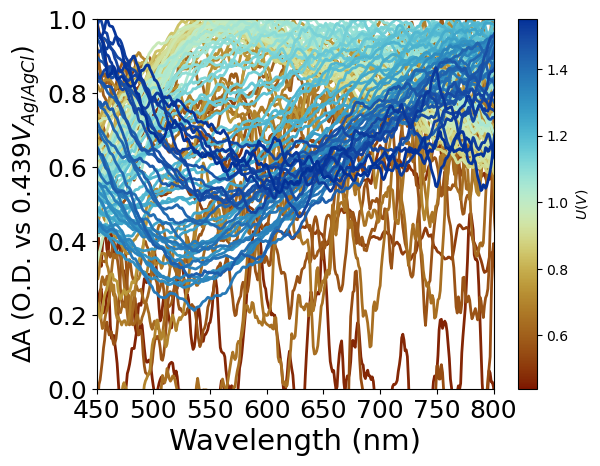

In [12]:
datdiff=sp.calculate_differential_spectra(data1, 0.01, smooth_strength=5)
sp.plot_DOD(datdiff, y_max=1, y_min=-0.0, x_min=450, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

(0.0, 2.0)

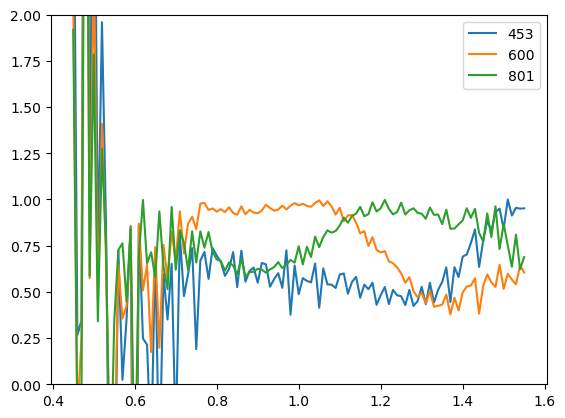

In [13]:
# extract the data at 450 nm and plot as a function of the column index

WL_val=453
trace450=datdiff.iloc[data1.index.values==WL_val,:]

plt.plot(trace450.columns, trace450.values[0,:], label=f'{WL_val}')

WL_val=600
trace850=datdiff.iloc[data1.index.values==WL_val,:]

plt.plot(trace850.columns, trace850.values[0,:],label=f'{WL_val}')

WL_val=801
trace550=datdiff.iloc[data1.index.values==WL_val,:]

plt.plot(trace550.columns, trace550.values[0,:],label=f'{WL_val}')

plt.legend()
# y range 0 to 1

plt.ylim(0,2)

In [14]:
comp1=sp.extract_average_spectrum_in_voltage_window(datdiff, 0.8, 0.9)
comp2=sp.extract_average_spectrum_in_voltage_window(datdiff, 1.25, 1.3)
comp3=sp.extract_average_spectrum_in_voltage_window(datdiff, 1.45, 1.48)


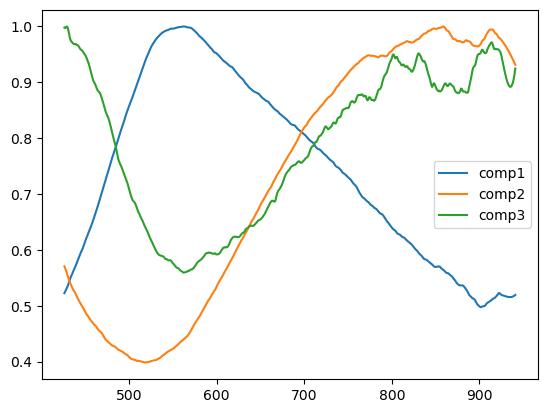

In [15]:

comp1=comp1/comp1.max()
comp2=comp2/comp2.max()
comp3=comp3/comp3.max()

# plot the extracted components against the index of each spectrum
plt.plot(comp1, label='comp1')
plt.plot(comp2, label='comp2')
plt.plot(comp3, label='comp3')

df_spectra=data1


df_components=pd.DataFrame({'comp1':comp1, 'comp2': comp2, 'comp3':comp3})

plt.legend()

 


In [18]:
# generate a custom bounds dataframe,where the first two collumns define the region of U where the component is valid, 
#the second two collumns define the bounds in that region
U=data1.columns.values


region1={'U_min':0, 'U_max':0.9, 'lowerA': 0, 'upperA': 1.0, 'lowerB': 0, 'upperB': 0.000001, 'lowerC': 0, 'upperC': 0.000001}
region2={'U_min':0.8, 'U_max':1.1, 'lowerA': 0.00, 'upperA': 0.1, 'lowerB': 0, 'upperB': 0.1, 'lowerC': 0, 'upperC': 0.000001}
region3={'U_min':1.1, 'U_max':1.35, 'lowerA': 0.0, 'upperA': 0.1, 'lowerB': 0, 'upperB': 1, 'lowerC': 0, 'upperC': 0.1}
region4={'U_min':1.35, 'U_max':2.5, 'lowerA': 0.0, 'upperA': 0.1, 'lowerB': 0.0, 'upperB': 0.1, 'lowerC': 0, 'upperC': 0.1}

print(pd.DataFrame({'region1':region1, 'region2':region2,'region3':region3, 'region4':region4 }).T)

total={'region1':region1, 'region2':region2, 'region3':region3, 'region4':region4}



def get_region(U, total):
    # define a function that takes a single float U as input, it iterates though each item in total and checks if
    # U is withing U_min and U_max, if it is it returns the dictionary for that region
    for key, value in total.items():
        if value['U_min']<=U<=value['U_max']:
            return value
        
def parse_region(region_dict):
    """
    This funtion takes in a dictionary with the following keys:
    U_min: float, the minimum potential in the region
    U_max: float, the maximum potential in the region
    lowerA: float, the lower bound for the component A
    upperA: float, the upper bound for the component A
    lowerB: float, the lower bound for the component B
    upperB: float, the upper bound for the component B
    lowerC: float, the lower bound for the component C
    upperC: float, the upper bound for the component C

    it returns a dictionar with key (U_min, U_max) and values (lowerA, upperA, lowerB, upperB)
    

    """
    return {(region_dict['U_min'], region_dict['U_max']):
             [[region_dict['lowerA'], region_dict['lowerB'], region_dict['lowerC']],
               [region_dict['upperA'], region_dict['upperB'], region_dict['upperC']] ]}


bounds=parse_region(get_region(2, total))

key=list(bounds.keys())[0]

bounds[key]

         U_min  U_max  lowerA  upperA  lowerB    upperB  lowerC    upperC
region1   0.00   0.90     0.0     1.0     0.0  0.000001     0.0  0.000001
region2   0.80   1.10     0.0     0.1     0.0  0.100000     0.0  0.000001
region3   1.10   1.35     0.0     0.1     0.0  1.000000     0.0  0.100000
region4   1.35   2.50     0.0     0.1     0.0  0.100000     0.0  0.100000


[[0.0, 0.0, 0], [0.1, 0.1, 0.1]]

In [19]:
fit_results = {}

# Loop over each column in df_spectra (each spectrum corresponds to a potential)
for i,col in enumerate(df_spectra.columns):
    # Get the spectrum (y) you want to fit
    spectrum = df_spectra[col].values
    
    # Get the component spectra (X)
    components = df_components.values  # The component spectra (X)

    # Get the potential (U) from the column name (assuming it's a float)
    U = float(col)
    
    # Get the region-specific bounds based on the potential U
    bounds=parse_region(get_region(U, total))
    key=list(bounds.keys())[0]

    bounds=bounds[key]
    #print(bounds)

    # Extract the bounds as [lower_bounds, upper_bounds]
    if i==0:
        #print(bounds)
        continue
    # Perform the linear combination fit using bounded least squares
    # We are solving y = X * coefficients, with bounds on the coefficients for components A and B
    result = lsq_linear(components, spectrum, bounds=bounds)
    
    # Store the resulting coefficients in the dictionary
    fit_results[col] = result.x  # 'result.x' contains the optimal coefficients

# Convert the fit results dictionary into a DataFrame for better readability
df_fit_results = pd.DataFrame(fit_results, index=['Component A', 'Component B', 'Component C'])



,0.440587,0.440581,0.441574,0.442567,0.443560,0.444552,0.445545,0.446537,0.447529,0.448520,...,1.550562,1.551059,1.551514,1.551871,1.552169,1.553385,1.553694,1.554158,1.554869,1.554896
Component A,2.740248e-14,6.216876e-10,8.583387e-05,2.044598e-04,7.084669e-11,6.922117e-11,1.106635e-10,2.000299e-05,8.282458e-12,1.832181e-10,...,0.061911,0.061965,0.062015,0.061958,0.061940,0.061885,0.061883,0.061996,0.061955,0.061927
Component B,1.139230e-19,3.040420e-15,2.248475e-07,1.000000e-06,4.218901e-16,4.398735e-16,6.180808e-16,1.000000e-06,7.786119e-17,7.014159e-16,...,0.066682,0.066662,0.066650,0.066602,0.066781,0.066690,0.066658,0.066491,0.066560,0.066512
Component C,1.034081e-19,2.545795e-15,9.999998e-07,1.000000e-06,3.139080e-16,3.321118e-16,4.758980e-16,4.516731e-13,4.924166e-17,6.743188e-16,...,0.015816,0.015897,0.015908,0.016021,0.015806,0.015869,0.015870,0.016102,0.016051,0.016193


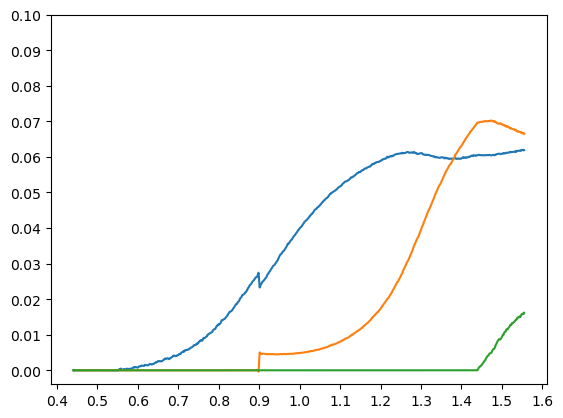

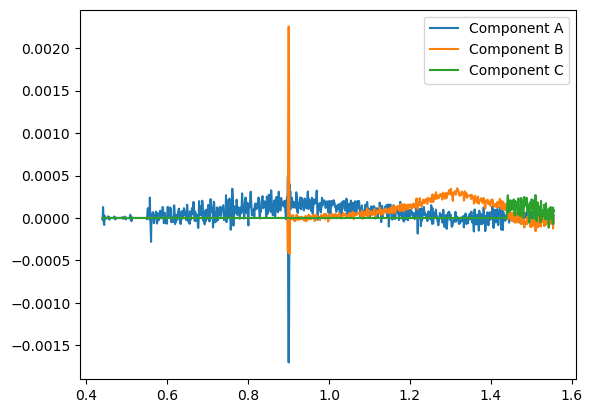

In [27]:


from scipy.signal import savgol_filter

# apply the savgol filter to the rows of the dataframe
df_fit_results_smoothed = df_fit_results.T.apply(lambda x: savgol_filter(x, 5, 3))
plt.plot(df_fit_results_smoothed.index, df_fit_results_smoothed['Component A'])
plt.plot(df_fit_results_smoothed.index, df_fit_results_smoothed['Component B'])
plt.plot(df_fit_results_smoothed.index, df_fit_results_smoothed['Component C'])

# set the x axis ticks to 0.1
plt.xticks(np.arange(0.4, 1.61, 0.1))
# set the y axis ticks to 0.01

plt.yticks(np.arange(0, 0.11, 0.01))


# take the derivative of the fit results
df_fit_results_diff=df_fit_results_smoothed.diff(axis=0)
#set any NaN values to zero
df_fit_results_diff.fillna(0, inplace=True)

# smooth the derivative of the fit results with a golay filter
# import golaty filter from sklearn


# plot the smoothed derivative of the fit results
df_fit_results_diff.plot()
df_fit_results

Text(0.5, 1.0, 'Deconvolution of spectra')

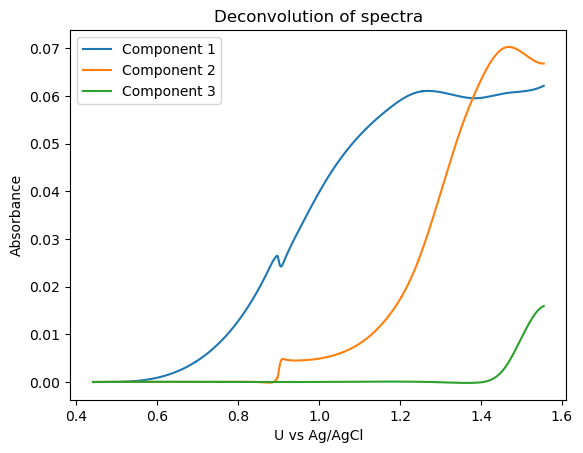

In [29]:
import numpy as np
from scipy.interpolate import UnivariateSpline

# Sort the x values and corresponding y values
sorted_indices = np.argsort(df_fit_results.columns.values)
sorted_x = df_fit_results.columns.values[sorted_indices]
sorted_y_A = df_fit_results.T['Component A'].values[sorted_indices]
sorted_y_B = df_fit_results.T['Component B'].values[sorted_indices]
sorted_y_C = df_fit_results.T['Component C'].values[sorted_indices]

# Define the weight
weight = 2 * np.exp(-11)

# Create the splines with sorted x and y values
spl = UnivariateSpline(sorted_x, sorted_y_A, k=3, s=weight)
spl2 = UnivariateSpline(sorted_x, sorted_y_B, k=3, s=weight)
spl3 = UnivariateSpline(sorted_x, sorted_y_C, k=3, s=weight)

# Evaluate the splines at the original x values
spl_A_values = spl(df_fit_results.columns.values)
spl_B_values = spl2(df_fit_results.columns.values)
spl_C_values = spl3(df_fit_results.columns.values)

# plot spl and spl2
plt.plot(df_fit_results.columns.values,spl_A_values, label='Component 1')
plt.plot(df_fit_results.columns.values,spl_B_values, label='Component 2')
plt.plot(df_fit_results.columns.values,spl_C_values, label='Component 3')

plt.legend()

# x axis is U vs agagcl
plt.xlabel('U vs Ag/AgCl')
plt.ylabel('Absorbance')

# title - deconvolution of spectra, no olefin
plt.title('Deconvolution of spectra')


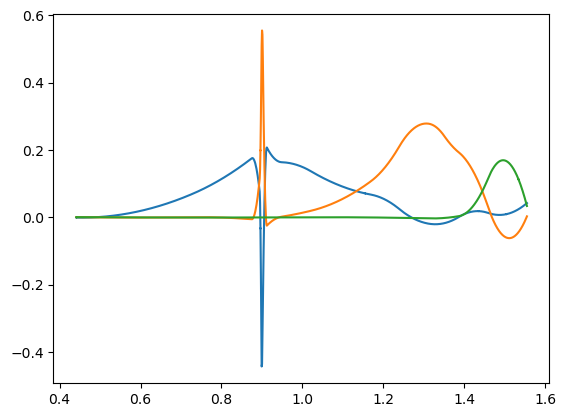

In [32]:
capdiff=spl.derivative(n=1)
capdiff2=spl2.derivative(n=1)
capdiff3=spl3.derivative(n=1)

capdiff_values=capdiff(df_fit_results.columns.values)
capdiff_values2=capdiff2(df_fit_results.columns.values)
capdiff_values3=capdiff3(df_fit_results.columns.values)

plt.plot(df_fit_results.columns.values,capdiff_values, label='Component 1')
plt.plot(df_fit_results.columns.values,capdiff_values2, label='Component 2')
plt.plot(df_fit_results.columns.values,capdiff_values3, label='Component 3')

In [30]:
# comine spl and spl2 into a single dataframe with index df_fit_results.columns.values

df_spl=pd.DataFrame({'Component A':spl, 'Component B':spl2, 'Component C': spl3}, index=df_fit_results.columns.values)

# save as a csv file names waterfit
if False:
    df_spl.to_csv('run2_comps.csv')


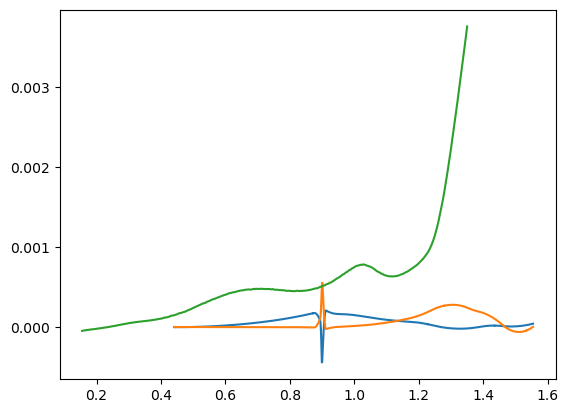

In [39]:
guess_alpha1=1
guess_alpha2=1

scan_rate=0.001

def get_J(alpha, cap, scan_rate):
    return (cap/(alpha))*scan_rate


J1=get_J(guess_alpha1, capdiff_values, scan_rate)
J2=get_J(guess_alpha2, capdiff_values2, scan_rate)
J3=get_J(guess_alpha2, capdiff_values3, scan_rate)

# insert 0 as the first value of J1 and J2 and J3
#J1=np.insert(J1, 0, 0)
#J2=np.insert(J2, 0, 0)
#J3=np.insert(J3, 0, 0)


# plot J1 and J2
plt.plot(df_fit_results.columns.values,J1)
plt.plot(df_fit_results.columns.values,J2)

# get the CV scan 

J=SpEC1.CV_scans[2]['anodic']['I_A']
U_scan=SpEC1.CV_scans[2]['anodic']['Ewe_V']

plt.plot(U_scan, J)

/var/folders/vm/d986p9hx0rlglk34b43v_h180000gn/T/ipykernel_5096/3644665212.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', num_lines)


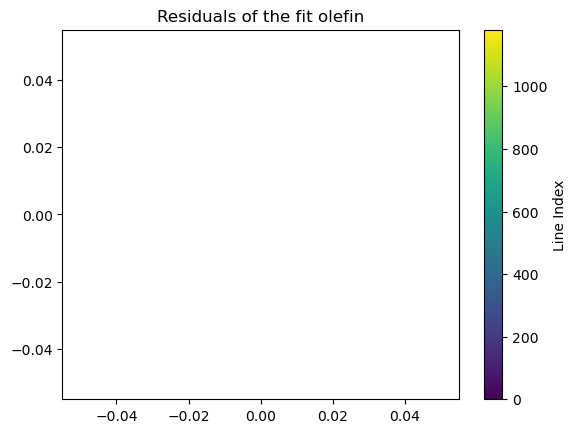

In [42]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Colormap functionality
import pandas as pd

# Assuming df_spectra, df_components, and df_fit_results are defined elsewhere in your code
num_lines = len(df_spectra.columns)
colormap = cm.get_cmap('viridis', num_lines)

# Reconstruct the spectra by multiplying the components by the fit coefficients
reconstructed = pd.DataFrame(df_components.values @ df_fit_results.values)
reconstructed.index = df_spectra.index
#reconstructed.columns = df_spectra.columns

# Subtract the reconstructed spectra from the original spectra
residuals = df_spectra - reconstructed

# Plot the residuals with the color map
ax = residuals.plot(cmap='viridis', legend=False)

# Add a colorbar if you need to show the color mapping
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=0, vmax=num_lines-1))
sm.set_array([])  # Empty array for colorbar
plt.colorbar(sm, ax=ax, label='Line Index')
# title - residuals of the fit olefin
plt.title('Residuals of the fit olefin')
plt.show()